# Wine Quality Prediction 🍷
> Linear Regression

### Import libraries

In [1456]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, root_mean_squared_error

### Step 1 : Business understanding

In [1457]:
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


### Step 2: Data understanding

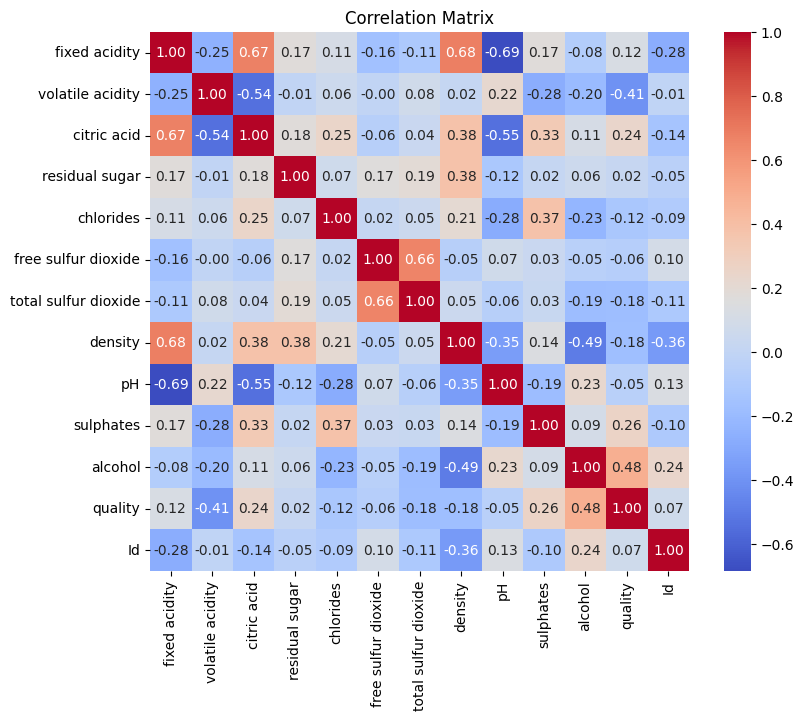

In [1458]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(9, 7))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

plt.show()


จากการวิเคราะห์ Correlation Matrix พบว่า
1. correlation ของ free sulfur dioxide และ total sulfer dioxide มีค่าเกี่ยวเนื่องกัน ซึ่งแสดงให้เห็นว่ามีความเป็น ***multicollinearity*** ที่สื่อถึงความสัมพันธ์กันสูงมาก ซึ่งสามารถส่งผลกระทบต่อการวิเคราะห์และการตีความผลลัพธ์จากโมเดลเวลานำไปเทรนได้ ทำให้เราต้องเลือกตัดอันใดอันหนึ่งออก เพื่อลดปัญหาและความซับซ้อนของโมเดล ซึ่งเราจะเอา free sulfur dioxide ออก เพราะ correlation กับ target มีค่าน้อยกว่า total sulfer dioxide

2. เราจะทำการนำ feature ที่มี correlation กับ target น้อย ๆ ออกด้วย ซึ่งคือ residual sugar และ pH เพื่อลดความซับซ้อนของ model และช่วยลดโอกาสที่จะเกิด overfitting

3. เราจะทำการนำ unique data (Id) ออกด้วย เพราะ ไม่มีความสัมพันธ์กับ target และทำให้ model ซับซ้อนขึ้นเปล่า ๆ

### Step 3: Data preparation

ในการ cleansing data เราจะทำตามขั้นตอนที่เราได้วิเคราะห์ในขั้นตอน data understanding รวมถึงการเช็ค missing value และ duplicated value ด้วย

In [1459]:
df_cleaned = df.copy()

- เช็ค duplicated value

In [1460]:
print("Total duplicated value in dataset:", df_cleaned.duplicated().sum())

Total duplicated value in dataset: 0


- เช็ค missing value

In [1461]:
missing_summary = df.isnull().sum()
print("Total missing value in dataset\n")
print(missing_summary)

Total missing value in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


- นำ feature ที่ไม่มีความจำเป็นออก

In [1462]:
df_cleaned = df_cleaned.drop(columns=['free sulfur dioxide', 'residual sugar', 'pH', 'Id'])
df_cleaned

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1139,6.8,0.620,0.08,0.068,38.0,0.99651,0.82,9.5,6
1140,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1141,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6


### Step 4: Modeling

- กำหนด X และ y จากข้อมูลที่ผ่านการ cleaned แล้ว (set role)

In [1463]:
X = df_cleaned.drop(columns=['quality'])
y = df_cleaned['quality']

- Split data เป็น training 80% และ testing 20%

In [1464]:
# Split the data into training 80% and testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- Apply model และทดสอบ performance

In [1465]:
model = LinearRegression()

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
error = root_mean_squared_error(y_test, y_pred)
print(f"Performance error: {error}")

Performance error: 0.666949407109636


### Step 5: Evaluation Validation

ใช้ 10-fold Cross-Validation เพื่อวัดประสิทธิภาพของ model

In [1466]:
model = LinearRegression()
# Perform 10-fold cross-validation on the training set
rmse_scorer = make_scorer(root_mean_squared_error)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring=rmse_scorer)

print(f"RMSE (Cross-validation): {scores.mean()}")

RMSE (Cross-validation): 0.642681797345442


### Step 6: Deployment

สรุปภาพรวมของทั้ง flow และดูผล prediction ของ model

RMSE-Cross-validation  : 0.6490588751054209
Performance error      : 0.6212396050750388


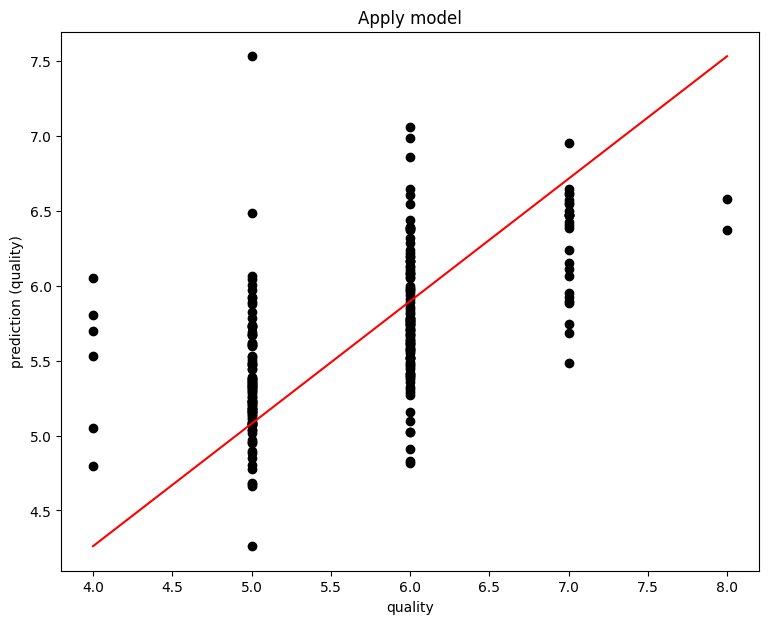

In [1467]:
model = LinearRegression()

X = df_cleaned.drop(columns=['quality'])
y = df_cleaned['quality']

# Split the data into training 80% and testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Perform 10-fold cross-validation on the training set
rmse_scorer = make_scorer(root_mean_squared_error)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring=rmse_scorer)

print(f"RMSE-Cross-validation  : {scores.mean()}")

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
mse_test = root_mean_squared_error(y_test, y_pred)
print(f"Performance error      : {mse_test}")

plt.figure(figsize=(9, 7))
plt.title("Apply model")
plt.xlabel("quality")
plt.ylabel("prediction (quality)")
plt.scatter(y_test, y_pred, c="black")
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], c="red")
plt.show()
